# Kelly criterion return-vol tradeoff
examining the tradeoff between returns and volatility when using the Kelly criterion to size bets

The Kelly criterion optimizes the log growth rate. The Taylor expansion for log gives us:

In [67]:
from IPython.display import display, Math, Latex
display(Math(r'log(1+x) = \sum_{n=1}^{\infty} (-1)^{n+1} \dfrac{x^n}n, \left|x\right|  \leqslant 1, x \neq -1'))

<IPython.core.display.Math object>

This is our objective function to maximise. We can approximate by taking the first two terms

In [ ]:
if strategy has high alpha and is positively skewed, then throwing away terms is bad. markowitz doesnt have the same sensitivity

heuristic proof here https://en.wikipedia.org/wiki/Kelly_criterion#Proof (calculate amount won with optimal size and introdue a delta to size, differentiate w.r.t. delta and show delta = 0 at the max)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# parameterisation
start_bankroll = 10000
trade_count = 10000
# for our purposes, our model is perfect
win_prob = 0.53 
# assume 5% edge
price = 0.50
dec_price = 1/price - 1

In [8]:
def run_trials(win_prob, bankroll, trade_count, dec_price):
    std = []
    mean = []
    for y in range(0,50):
        bankroll = []
        returns = []
        df = pd.DataFrame()
        for i in range(0, trade_count):
            if i == 0:
                step_bankroll = start_bankroll
            else:
                step_bankroll = bankroll[i-1]
            kelly_prop = (win_prob * (dec_price+1) - 1) / dec_price
            win = np.random.rand() <= win_prob
            trade_size = kelly_prop*step_bankroll
            profit = dec_price*trade_size if win else -1*trade_size
            returns.append(profit/step_bankroll)
            step_bankroll += profit
            bankroll.append(step_bankroll)

        df['bankroll'] = bankroll
        df['return'] = returns
        std.append(np.std(df['return']))
        mean.append(np.mean(df['return']))
        plt.plot(df['bankroll'][0:1000])    

    var = [i**2 for i in std]
    av_var = sum(var) / len(var)
    av_std = av_var**0.5
    av_mean = np.mean(mean)
#     plt.show()
    return {'win_prob': win_prob,'std': av_std, 'mean': av_mean}

In [11]:
result = pd.DataFrame()
for x in np.arange(0.05, 1, 0.05):
    start_bankroll = 10000
    trade_count = 10000
    win_prob = x
    # assume 3% edge
    price = x - 0.03
    dec_price = 1/price - 1
    result = result.append(run_trials(win_prob, start_bankroll, trade_count, dec_price), ignore_index=True)

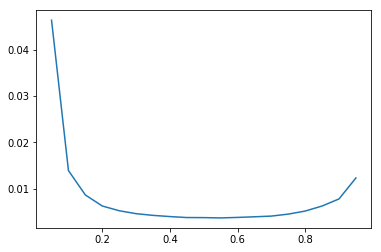

In [68]:
plt.plot(result['win_prob'], result['mean'])
plt.show()

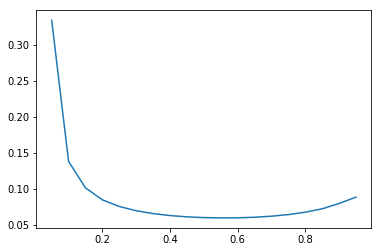

In [69]:
plt.plot(result['win_prob'], result['std'])
plt.show()

we see that for bets where we have an edge and the win probability is low (thus resulting in a high payoff when we win),
the associated volatility is then high and the expected return is high.

In [72]:
#sharpe ratios (assume rf = 0)
result['sharpe_ratio'] = result['mean'] / result['std']

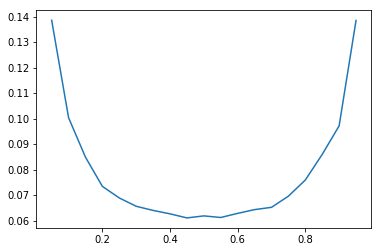

In [73]:
plt.plot(result['win_prob'], result['sharpe_ratio'])
plt.show()

This suggests that the highest expected risk-adjusted returns are for very low and very high probability bets.
this may be a bias in our edge. if we got to 100% return and 97% predicted and we were perfect, our bets go exponential

In [ ]:
# sortino ratio